<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumDataInputwithAmplitudeEncoding_20241004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python3 -m pip install qiskit[visualization]==1.0.2
#!python3 -m pip install qiskit-ibm-provider==0.11.0
!python3 -m pip install qiskit-aer==0.14.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.1 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=90aedc4090ad89b2db5aeb87b8a0259c6dc4aedb66350f3753a974bed8f50cd0
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 55.1 MB/s eta 0:00:00


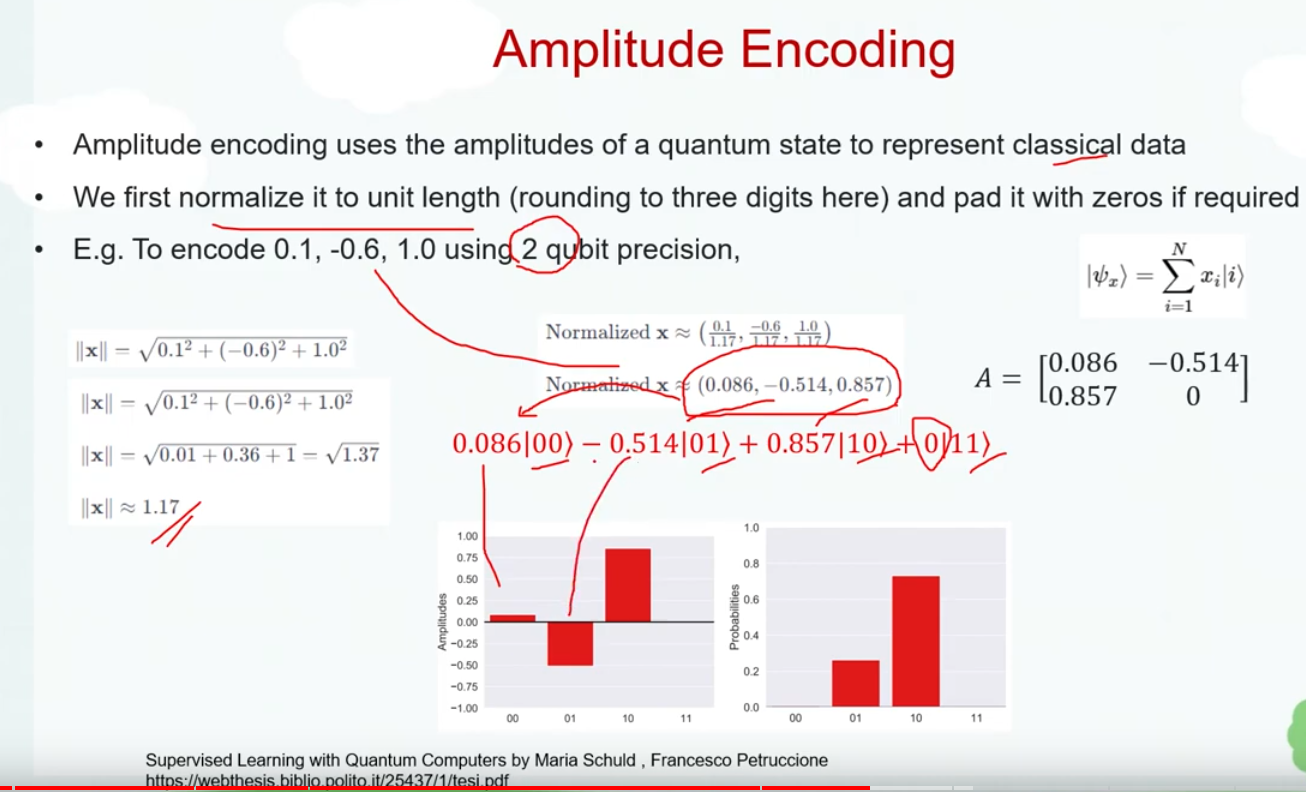

In [70]:
# Qiskit Local Simulator 사용하기 위한 준비
from qiskit_aer import Aer
import numpy as np
from qiskit import QuantumCircuit

In [71]:
# 1. 입력 숫자를 벡터로 준비합니다.
input_vector = np.array([0.1, -0.6, 1.0, 0.35])

In [72]:
# 2. 벡터를 정규화합니다.
norm = np.linalg.norm(input_vector)
normalized_vector = input_vector / norm
print(normalized_vector)

[ 0.08185455 -0.49112731  0.81854551  0.28649093]


In [73]:
# 3. Qiskit 회로 생성 및 초기화
circuit = QuantumCircuit(2)  # 4개의 큐비트 사용
circuit.initialize(normalized_vector, [0, 1])  # 큐비트에 상태 벡터 입력

In [74]:
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()

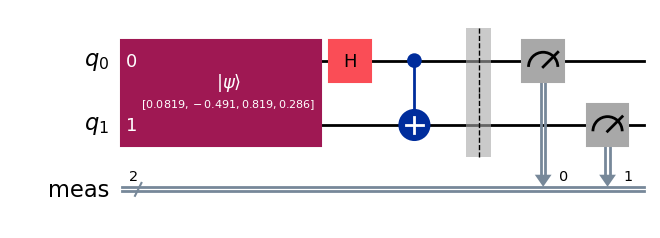

In [75]:
#여러 장치들에게 선택적으로 수행시키기 위한 준비
from qiskit.compiler import transpile, assemble
backend = Aer.get_backend('qasm_simulator')  #Local Qiskit Aer 시뮬레이터 사용
trans_qc = transpile(circuit, backend)
trans_qc.draw('mpl')

In [76]:
from qiskit.providers.jobstatus import JobStatus
import time

job = backend.run(trans_qc, shots=1024)

print("Job ID is", job.job_id(),"\n")

# 제출된 잡에 대한 실행 상태 확인
while job.status() is not JobStatus.DONE:
	print("Job status is", job.status() )
	time.sleep(2)
###while

print("Job status is", job.status() )

# 결과 출력
counts = job.result().get_counts()
print(counts)

Job ID is 8a82d7d2-c148-4405-a888-027368bb4738 

Job status is JobStatus.DONE
{'01': 136, '11': 169, '10': 626, '00': 93}


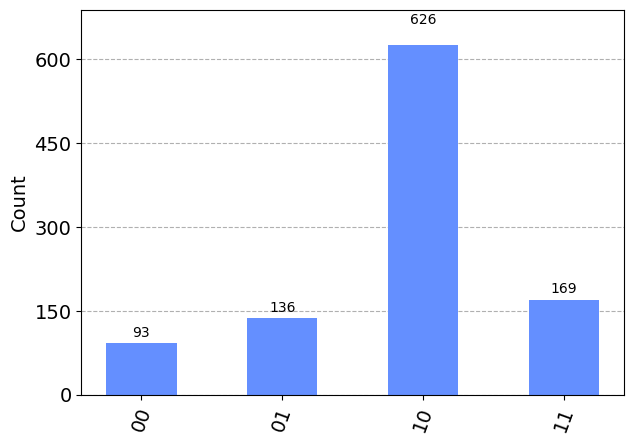

In [77]:
from qiskit.visualization import plot_histogram
plot_histogram(data=counts)